In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-players-sold-2024/TOP_BUYS.csv
/kaggle/input/ipl-players-sold-2024/UNSOLD_PLAYERS.csv
/kaggle/input/ipl-players-sold-2024/IPL_PLAYERS.csv


In [2]:
data = pd.read_csv("/kaggle/input/ipl-players-sold-2024/IPL_PLAYERS.csv")
data

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
...,...,...,...,...,...
67,Akash Singh,Indian,Bowler,2000000,SH
68,Jaydev Unadkat,Indian,Bowler,16000000,SH
69,Wanindu Hasaranga,Overseas,All-Rounder,15000000,SH
70,Pat Cummins,Overseas,All-Rounder,205000000,SH


### Preprocessing Steps
1. Handling Missing Data:
2. Ensure that the data types of columns are appropriate
1. Duplicates
1. Standardize or clean column names
1. Handling Outliers: Identify and decide on a strategy for handling outliers 
1. Categorical Variables: Encode categorical variables
1. Feature Scaling: scale numerical features 
1. Exploratory Data Analysis (EDA): Visualize the data using plots (histograms, scatter plots, etc.) to understand distributions and relationships.
1. Handling Irrelevant Columns: Remove columns that are not useful for analysis or modeling.

#### 1. Check for missing data
> There is no missing value in the dataset.

In [3]:
data.isnull().sum()

PLAYERS        0
NATIONALITY    0
TYPE           0
PRICE PAID     0
TEAM           0
dtype: int64

#### 2. Check datatype of columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
 4   TEAM         72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


#### 3. check for duplicates rows

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
 4   TEAM         72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


#### 4. Change column name

In [6]:
print("Old name :",data.columns)
new_name = {'PLAYERS':'PLAYERS', 'NATIONALITY':'NATIONALITY', 'TYPE':'PLAYER_TYPE', 'PRICE PAID':'PRICE_PAID', 'TEAM':'TEAM'}
data.rename(columns=new_name, inplace=True)
print("New name :",data.columns)

Old name : Index(['PLAYERS', 'NATIONALITY', 'TYPE', 'PRICE PAID', 'TEAM'], dtype='object')
New name : Index(['PLAYERS', 'NATIONALITY', 'PLAYER_TYPE', 'PRICE_PAID', 'TEAM'], dtype='object')


#### 5. Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Auction Amount Graph')

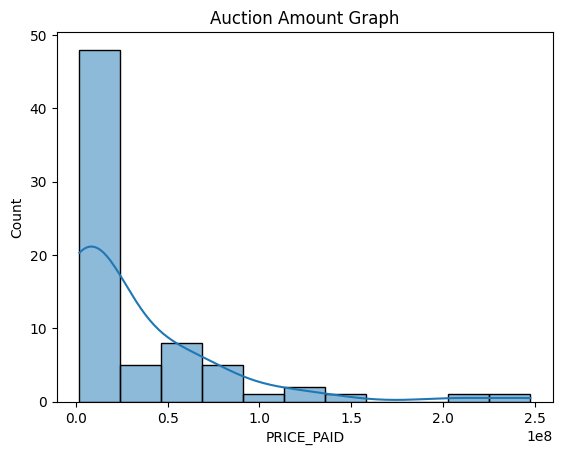

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data.PRICE_PAID, kde=True)
plt.title('Auction Amount Graph')

## Showcasing the top 10 most expensive players

In [8]:
data.sort_values(by='PRICE_PAID', ascending=False).head(10)

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
27,Mitchell Starc,Overseas,Bowler,247500000,KKR
70,Pat Cummins,Overseas,All-Rounder,205000000,SH
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
54,Harshal Patel,Indian,All-Rounder,117500000,PK
63,Alzarri Joseph,Overseas,Bowler,115000000,RCB
16,Spencer Johnson,Overseas,Bowler,100000000,GT
3,Sameer Rizvi,Indian,Batter,84000000,CSK
52,Rilee Rossouw,Overseas,Batter,80000000,PK
56,Rovman Powell,Overseas,Batter,74000000,RR
21,Shahrukh Khan,Indian,All-Rounder,74000000,GT


### Showcasing Most Expensive player in each team

In [9]:
data.loc[data.groupby(by='TEAM')['PRICE_PAID'].idxmax()].sort_values(by='PRICE_PAID', ascending=False)

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
27,Mitchell Starc,Overseas,Bowler,247500000,KKR
70,Pat Cummins,Overseas,All-Rounder,205000000,SH
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
54,Harshal Patel,Indian,All-Rounder,117500000,PK
63,Alzarri Joseph,Overseas,Bowler,115000000,RCB
16,Spencer Johnson,Overseas,Bowler,100000000,GT
56,Rovman Powell,Overseas,Batter,74000000,RR
12,Kumar Kushagra,Indian,Wicket-Keeper,72000000,DC
36,Shivam Mavi,Indian,Bowler,64000000,LSG
46,Gerald Coetzee,Overseas,All-Rounder,50000000,MI


### Showcasing Least Expensive player in each team

In [10]:
data.loc[data.groupby(by='TEAM')['PRICE_PAID'].idxmin()]

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
6,Ricky Bhui,Indian,Wicket-Keeper,2000000,DC
17,Manav Suthar,Indian,Bowler,2000000,GT
26,Angkrish Raghuvanshi,Indian,Batter,2000000,KKR
37,Arshin Kulkarni,Indian,All-Rounder,2000000,LSG
40,Shreyas Gopal,Indian,Bowler,2000000,MI
48,Tanay Thyagarajann,Indian,All-Rounder,2000000,PK
62,Saurav Chuahan,Indian,Batter,2000000,RCB
57,Abid Mushtaq,Indian,All-Rounder,2000000,RR
66,Jhathavedh Subramanyan,Indian,Bowler,2000000,SH


## Showcase Each Teams, Player, Nationality, Playing type, and Auction Value

In [11]:
data.TEAM.unique()

array(['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PK', 'RR', 'RCB', 'SH'],
      dtype=object)

In [12]:
def Teams_details(team_name):
    df = data[data.TEAM == team_name].sort_values(by='PRICE_PAID', ascending=False)
    return df    

### 1. Mumbai Indian 

In [13]:
team_mi = Teams_details('MI')
team_mi

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
46,Gerald Coetzee,Overseas,All-Rounder,50000000,MI
45,Nuwan Thushara,Overseas,Bowler,48000000,MI
39,Dilshan Madushanka,Overseas,Bowler,46000000,MI
43,Mohammad Nabi,Overseas,All-Rounder,15000000,MI
40,Shreyas Gopal,Indian,Bowler,2000000,MI
41,Shivalik Sharma,Indian,All-Rounder,2000000,MI
42,Anshul Kamboj,Indian,All-Rounder,2000000,MI
44,Naman Dhir,Indian,All-Rounder,2000000,MI


### 2. CSK: Chennai Super Kings

In [14]:
team_csk = Teams_details('CSK')
team_csk

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
5,Shardul Thakur,Indian,All-Rounder,40000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK


### 3. DC: Delhi Capitals


In [15]:
team_dc = Teams_details('DC')
team_dc

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
12,Kumar Kushagra,Indian,Wicket-Keeper,72000000,DC
9,Jhye Richardson,Overseas,Bowler,50000000,DC
14,Harry Brook,Overseas,Batter,40000000,DC
7,Sumit Kumar,Indian,All-Rounder,10000000,DC
10,Shai Hope,Overseas,Wicket-Keeper,7500000,DC
13,Tristan Stubbs,Overseas,Wicket-Keeper,5000000,DC
6,Ricky Bhui,Indian,Wicket-Keeper,2000000,DC
8,Swastik Chhikara,Indian,Batter,2000000,DC
11,Rasikh Dar,Indian,Bowler,2000000,DC


### 4. GT: Gujarat Titans

In [16]:
team_gt = Teams_details('GT')
team_gt

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
16,Spencer Johnson,Overseas,Bowler,100000000,GT
21,Shahrukh Khan,Indian,All-Rounder,74000000,GT
22,Umesh Yadav,Indian,Bowler,58000000,GT
18,Robin Minz,Indian,Wicket-Keeper,36000000,GT
19,Sushant Mishra,Indian,Bowler,22000000,GT
15,Kartik Tyagi,Indian,Bowler,6000000,GT
20,Azmatullah Omarzai,Overseas,All-Rounder,5000000,GT
17,Manav Suthar,Indian,Bowler,2000000,GT


### 5. KKR: Kolkata Knight Riders

In [17]:
team_kkr = Teams_details('KKR')
team_kkr

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
27,Mitchell Starc,Overseas,Bowler,247500000,KKR
23,Mujeeb Rahman,Overseas,Bowler,20000000,KKR
28,Sherfane Rutherford,Overseas,Batter,15000000,KKR
25,Gus Atkinson,Overseas,Bowler,10000000,KKR
24,Manish Pandey,Indian,Batter,5000000,KKR
30,K.S. Bharat,Indian,Wicket-Keeper,5000000,KKR
31,Chetan Sakariya,Indian,Bowler,5000000,KKR
26,Angkrish Raghuvanshi,Indian,Batter,2000000,KKR
29,Ramandeep Singh,Indian,All-Rounder,2000000,KKR
32,Sakib Hussain,Indian,Bowler,2000000,KKR


### 6. LSG: Lucknow Supergiants

In [18]:
team_lsg = Teams_details('LSG')
team_lsg

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
36,Shivam Mavi,Indian,Bowler,64000000,LSG
35,M. Siddharth,Indian,Bowler,24000000,LSG
34,David Willey,Overseas,All-Rounder,20000000,LSG
33,Ashton Turner,Overseas,Batter,10000000,LSG
37,Arshin Kulkarni,Indian,All-Rounder,2000000,LSG
38,Mohd. Arshad Khan,Indian,All-Rounder,2000000,LSG


### 7. PK: Punjab Kings

In [19]:
team_PK = Teams_details('PK')
team_PK

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
54,Harshal Patel,Indian,All-Rounder,117500000,PK
52,Rilee Rossouw,Overseas,Batter,80000000,PK
47,Chris Woakes,Overseas,All-Rounder,42000000,PK
48,Tanay Thyagarajann,Indian,All-Rounder,2000000,PK
49,Vishwanath Pratap Singh,Indian,All-Rounder,2000000,PK
50,Ashutosh Sharma,Indian,All-Rounder,2000000,PK
51,Shashank Singh,Indian,Batter,2000000,PK
53,Prince Choudhary,Indian,Bowler,2000000,PK


### 8. RR: Rajasthan Royals

In [20]:
team_rr = Teams_details('RR')
team_rr

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
56,Rovman Powell,Overseas,Batter,74000000,RR
55,Shubham Dubey,Indian,Batter,58000000,RR
58,Nandre Burger,Overseas,Bowler,5000000,RR
59,Tom Kohler-Cadmore,Overseas,Wicket-Keeper,4000000,RR
57,Abid Mushtaq,Indian,All-Rounder,2000000,RR


### 9. RCB: Royal Challengers Bangalore

In [21]:
team_rcb = Teams_details('RCB')
team_rcb

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
63,Alzarri Joseph,Overseas,Bowler,115000000,RCB
65,Yash Dayal,Indian,Bowler,50000000,RCB
60,Lockie Ferguson,Overseas,Bowler,20000000,RCB
61,Tom Curran,Overseas,All-Rounder,15000000,RCB
62,Saurav Chuahan,Indian,Batter,2000000,RCB
64,Swapnil Singh,Indian,All-Rounder,2000000,RCB


### 10. SH: Sunrisers Hyderabad

In [22]:
team_sh = Teams_details('SH')
team_sh

,PLAYERS,NATIONALITY,PLAYER_TYPE,PRICE_PAID,TEAM
70,Pat Cummins,Overseas,All-Rounder,205000000,SH
71,Travis Head,Overseas,Batter,68000000,SH
68,Jaydev Unadkat,Indian,Bowler,16000000,SH
69,Wanindu Hasaranga,Overseas,All-Rounder,15000000,SH
66,Jhathavedh Subramanyan,Indian,Bowler,2000000,SH
67,Akash Singh,Indian,Bowler,2000000,SH
